# Thesis Preliminary Analysis
----------------------------
This is preliminary analysis for Sydney Bolim Son's thesis.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from scipy import stats

In [3]:
os.getcwd() # check directory

'C:\\Users\\bolim\\Desktop\\Thesis\\src'

In [4]:
# Read in the data
d = pd.read_csv('ETAdata3.csv')
# Check data
d.info()
d.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 12 columns):
userName         1323 non-null object
splitName        1322 non-null object
comment          1323 non-null object
n_recommend      1323 non-null int64
n_reply          1323 non-null int64
nyt_select       1323 non-null bool
recommendflag    1323 non-null int64
url              1323 non-null object
ttlCommentNum    1323 non-null int64
gender           1323 non-null float64
time             1323 non-null object
time_order       1323 non-null int64
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 115.1+ KB


,userName,splitName,comment,n_recommend,n_reply,nyt_select,recommendflag,url,ttlCommentNum,gender,time,time_order
0,AB,AB,This is when it hurts us not having a competen...,1046,7,False,0,https://www.nytimes.com/2020/03/09/business/st...,1486,2.0,2020-03-09 06:46:01,1
1,Mark,Mark,Our illustrious commander-in-chief was all too...,1183,17,False,0,https://www.nytimes.com/2020/03/09/business/st...,1486,0.0,2020-03-09 06:58:13,2
2,Nomind7,Nomind,This is when it hurts us not having universal ...,1046,33,False,0,https://www.nytimes.com/2020/03/09/business/st...,1486,2.0,2020-03-09 06:59:10,3
3,Michael,Michael,Oil prices falling is a symptom of demand fall...,136,4,False,0,https://www.nytimes.com/2020/03/09/business/st...,1486,0.0,2020-03-09 07:19:59,4
4,Larry,Larry,Virus at my daughters school in Boston. I have...,68,2,False,0,https://www.nytimes.com/2020/03/09/business/st...,1486,0.0,2020-03-09 07:29:30,5


In [5]:
# Read in the female data
w = pd.read_csv('ETAwomen.csv')
w.info()
w.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622 entries, 0 to 1621
Data columns (total 12 columns):
userName         1622 non-null object
splitName        1622 non-null object
comment          1622 non-null object
n_recommend      1622 non-null int64
n_reply          1622 non-null int64
nyt_select       1622 non-null bool
recommendflag    1622 non-null int64
url              1622 non-null object
ttlCommentNum    1622 non-null int64
gender           1622 non-null float64
time             1622 non-null object
time_order       1622 non-null int64
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 141.1+ KB


,userName,splitName,comment,n_recommend,n_reply,nyt_select,recommendflag,url,ttlCommentNum,gender,time,time_order
0,Carole,Carole,I will miss this place and if I can get in tod...,18,4,False,0,https://www.nytimes.com/2020/02/25/style/every...,191,1.0,2020-02-25 09:21:20,1
1,Jim Currie,Jim,a shame. I am not a nNew Yorker but I know a...,65,0,False,0,https://www.nytimes.com/2020/02/25/style/every...,191,0.0,2020-02-25 09:21:34,2
2,Michael G,Michael,Nearly 70 years ago on my way to summer camp ...,185,2,False,0,https://www.nytimes.com/2020/02/25/style/every...,191,0.0,2020-02-25 09:25:42,3
3,jade,jade,I don't know about the third-place thing. I'm ...,51,0,False,0,https://www.nytimes.com/2020/02/25/style/every...,191,2.0,2020-02-25 09:50:22,4
4,NR,NR,This farewell also mentions gone-but-not-forgo...,25,1,False,0,https://www.nytimes.com/2020/02/25/style/every...,191,2.0,2020-02-25 10:01:32,5


## Descriptive Summary Statistics
-------------
Below are some key descriptive statistics.

* __Dependent Variable: Number of Recommendations__

In [6]:
d['n_recommend'].describe() # summary statistics

count    1323.000000
mean      129.045351
std       508.192790
min         0.000000
25%        10.000000
50%        22.000000
75%        57.000000
max      7799.000000
Name: n_recommend, dtype: float64

In [7]:
w['n_recommend'].describe() # summary statistics

count    1622.000000
mean       63.735512
std       160.584999
min         0.000000
25%        11.000000
50%        21.000000
75%        46.000000
max      2061.000000
Name: n_recommend, dtype: float64

In [17]:
n_rec_array = np.asarray(d['n_recommend']) # set as numpy array for visualizations
w_n_rec_array = np.asarray(w['n_recommend'])

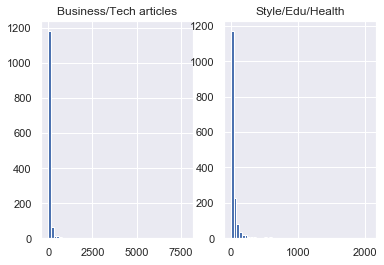

In [28]:
# Plain histogram to show the distribution
sns.set()

fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax1 = axes.flatten()

ax0.hist(n_rec_array, bins = 50)
ax0.set_title('Business/Tech articles')

ax1.hist(w_n_rec_array, bins = 50)
ax1.set_title('Style/Edu/Health')


plt.show()

Descriptive statistics show that the number of recommendations does not have a normal distribution. To make the values more even, it will be logged.

In [19]:
n_rec_log = np.log(n_rec_array + 1)
w_n_rec_log = np.log(w_n_rec_array + 1)

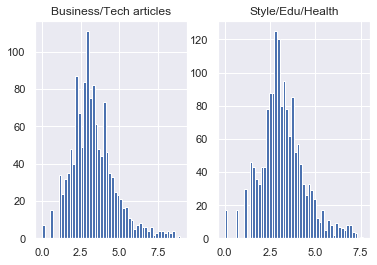

In [29]:
# Plain histogram to show the distribution
sns.set()

fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax1 = axes.flatten()

ax0.hist(n_rec_log, bins = 50)
ax0.set_title('Business/Tech articles')

ax1.hist(w_n_rec_log, bins = 50)
ax1.set_title('Style/Edu/Health')


plt.show()

In [33]:
print('For biz/tech articles, descriptive stats for y is: ', 
      stats.describe(n_rec_log))


print('For other articles, descriptive stats for y is: ', 
      stats.describe(w_n_rec_log))

For biz/tech articles, descriptive stats for y is:  DescribeResult(nobs=1323, minmax=(0.0, 8.961879012677683), mean=3.338620691179743, variance=2.009962096507261, skewness=0.9169943069909349, kurtosis=1.4515290162241792)
For other articles, descriptive stats for y is:  DescribeResult(nobs=1622, minmax=(0.0, 7.631431664576906), mean=3.2065384461493287, variance=1.5123352317601468, skewness=0.5306197916866975, kurtosis=0.9728773956151722)


Logging the data makes the data to have more normal distribution. Since the preliminary analysis model will use linear regression, the logged value will be used.

In [34]:
d['n_rec_log'] = n_rec_log
w['n_rec_log'] = w_n_rec_log

* __Independent variable: Gender__

In [35]:
print(d.groupby(['gender']).size())
print(w.groupby(['gender']).size())

gender
0.0    558
1.0    126
2.0    639
dtype: int64
gender
0.0    562
1.0    252
2.0    808
dtype: int64


0 is male, 1 is female and 2 is unknown. There are significant less number of women who write comments in the first place, _even for female popular articles!_

_**Note: might need to see if the gender classification algorithm is male friendly. Too many "unknown" genders here.**_

In [37]:
df = d.groupby(['gender', 'url']).size().reset_index(name = 'count')
df.pivot(index = 'url', columns = 'gender', values = 'count')

gender,0.0,1.0,2.0
url,,,
https://www.nytimes.com/2020/01/07/technology/sonos-sues-google.html,22,3,32
https://www.nytimes.com/2020/02/18/business/dealbook/michael-bloomberg-wall-street.html,83,16,76
https://www.nytimes.com/2020/02/24/technology/tech-start-up-boom-deflate.html,54,4,54
https://www.nytimes.com/2020/02/26/technology/personaltech/ubereats-doordash-postmates-grubhub-review.html,53,18,60
https://www.nytimes.com/2020/03/03/business/coronavirus-business-travel.html,14,5,15
https://www.nytimes.com/2020/03/05/business/boeing-david-calhoun.html,82,9,84
https://www.nytimes.com/2020/03/06/business/economy/jobs-report.html,42,9,63
https://www.nytimes.com/2020/03/09/business/stock-market-today.html,77,12,86
https://www.nytimes.com/2020/03/09/upshot/coronavirus-oil-prices-bond-yields-recession.html,73,12,90


Some comments have very low number for 'female'. To solve this, it shows that there needs to be more data gathering.

In [38]:
wdf = w.groupby(['gender', 'url']).size().reset_index(name = 'count')
wdf.pivot(index = 'url', columns = 'gender', values = 'count')

gender,0.0,1.0,2.0
url,,,
https://www.nytimes.com/2019/12/16/business/fashion-nova-underpaid-workers.html,52,28,95
https://www.nytimes.com/2019/12/17/style/fast-fashion-gen-z.html,28,24,66
https://www.nytimes.com/2020/02/03/style/jennifer-lopez-super-bowl.html,50,36,89
https://www.nytimes.com/2020/02/25/style/everybody-goes-to-burger-heaven.html,48,27,57
https://www.nytimes.com/2020/03/05/upshot/academic-job-crisis-phd.html,65,23,87
https://www.nytimes.com/2020/03/13/upshot/coronavirus-online-college-classes-unprepared.html,69,21,85
https://www.nytimes.com/2020/03/15/upshot/universal-child-care-democratic-platform.html,46,28,73
https://www.nytimes.com/2020/03/26/nyregion/coronavirus-brooklyn-hospital.html,63,29,83
https://www.nytimes.com/2020/03/30/us/politics/trump-women-coronavirus.html,66,20,89


*__Need to revisit the gender classification algorithm...__*

* __Possible Confounding 1: Comment order__

If someone posted his/her comment earlier than anyone else, his/her comment may have more number of recommendations.

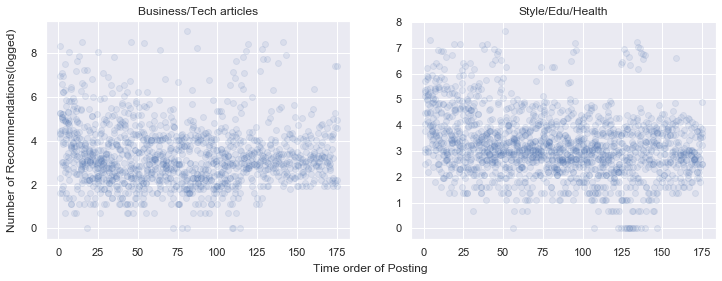

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12, 4))
ax0, ax1 = axes.flatten()

ax0.scatter(x = 'time_order', y = 'n_rec_log', data = d, alpha = 0.1)
ax0.set_title('Business/Tech articles')

ax1.scatter(x = 'time_order', y = 'n_rec_log', data = w, alpha = 0.1)
ax1.set_title('Style/Edu/Health')

fig.text(0.5, 0.01, 'Time order of Posting', ha='center')
fig.text(0.08, 0.5, 'Number of Recommendations(logged)', va='center', rotation='vertical')

plt.show()

The plot shows that time order of posting does not have much relevance with number of recommendations, which clears out possibility as a confounding factor.

* __Possible Confounding 2: NY Times Endorsement__

If someone posted his/her comment endorsed by NY Times, his/her comment may have more number of recommendations.

In [43]:
logged = d.groupby(['nyt_select'])['n_rec_log'].mean()
naive = d.groupby(['nyt_select'])['n_recommend'].mean()

print(logged, naive)

nyt_select
False    3.081533
True     5.726764
Name: n_rec_log, dtype: float64 nyt_select
False     48.872418
True     600.000000
Name: n_recommend, dtype: float64


In [69]:
logged = w.groupby(['nyt_select'])['n_rec_log'].mean()
naive = w.groupby(['nyt_select'])['n_recommend'].mean()

print(logged, naive)

nyt_select
False    3.109606
True     5.917192
Name: n_rec_log, dtype: float64 nyt_select
False     45.087484
True     585.214286
Name: n_recommend, dtype: float64


This shows that NY times endorsement is very related to receving more/less recommendations. This holds for both article groups.

* __Linearity Assumptions__ 

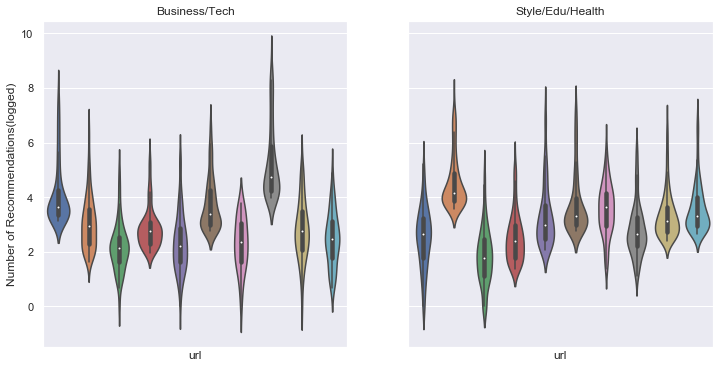

In [92]:
# Is distribution affected by article?
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,6), sharey = True)

sns.violinplot(x = 'url', y = 'n_rec_log', data = d, ax = ax[0]).set(title = 'Business/Tech', xticks = [], ylabel = 'Number of Recommendations(logged)')
sns.violinplot(x = 'url', y = 'n_rec_log', data = w, ax = ax[1]).set(title = 'Style/Edu/Health', xticks = [], ylabel = '')

plt.show()

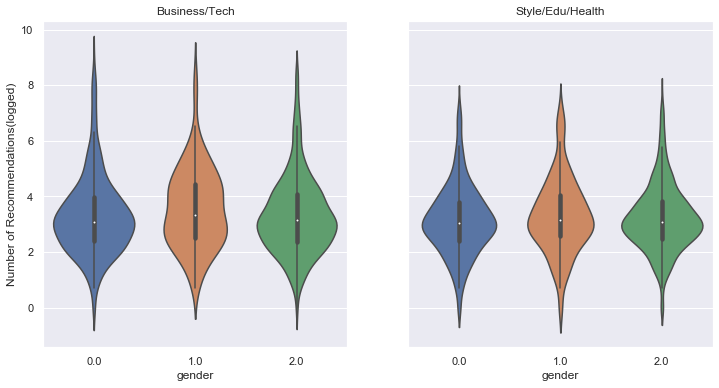

In [97]:
# Is distribution affected by gender?
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,6), sharey = True)

sns.violinplot(x = 'gender', y = 'n_rec_log', data = d, ax = ax[0]).set(title = 'Business/Tech', ylabel = 'Number of Recommendations(logged)')
sns.violinplot(x = 'gender', y = 'n_rec_log', data = w, ax = ax[1]).set(title = 'Style/Edu/Health', ylabel = '')

plt.show()

Regardless of gender, number of recommendations generally have normal distribution. 

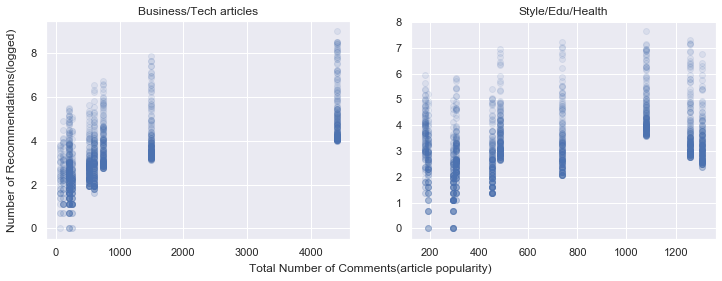

In [98]:
# Is article popularity relevant with the total number of recommendations?

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12, 4))
ax0, ax1 = axes.flatten()

ax0.scatter(x = 'ttlCommentNum', y = 'n_rec_log', data = d, alpha = 0.1)
ax0.set_title('Business/Tech articles')

ax1.scatter(x = 'ttlCommentNum', y = 'n_rec_log', data = w, alpha = 0.1)
ax1.set_title('Style/Edu/Health')

fig.text(0.5, 0.01, 'Total Number of Comments(article popularity)', ha='center')
fig.text(0.08, 0.5, 'Number of Recommendations(logged)', va='center', rotation='vertical')

plt.show()

## Vanilla Model (Linear Regression)
--------------------

Below is the result of simple linear regression that takes three arguments:

1) Number of Recommendations, logged (dependent variable)

2) Gender (independent variable)

3) NYTimes endorsement (possible confounding)

4) Article popularity (possible confounding) -> maybe include or not

In [99]:
from statsmodels.formula.api import ols

fit1 = ols('n_rec_log ~ C(gender) + C(nyt_select)', data = d).fit()

fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_rec_log   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     86.74
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           3.17e-51
Time:                        12:35:48   Log-Likelihood:                -2219.5
No. Observations:                1323   AIC:                             4447.
Df Residuals:                    1319   BIC:                             4468.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.1821      0.055     57.337      0.000       3.073       3.291
C(gender)[T.1.0]          0.2708      0.128      2.117      0.034       0.020       0.522
C(gender)[T.2.0]          0.0365      0.075      0.486      0.627      -0.111       0.184
C(nyt_select)[T.True]     2.9915      0.187     15.991      0.000       2.625       3.358
==============================================================================
Omnibus:                      108.854   Durbin-Watson:                   0.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.775
Skew:                           0.657   Prob(JB):                     6.69e-34
Kurtosis:                       4.023   Cond. No.                         5.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
fit1_ = ols('n_rec_log ~ C(gender) + C(nyt_select)', data = w).fit()
fit1_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_rec_log   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     114.5
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           3.01e-67
Time:                        12:39:40   Log-Likelihood:                -2480.3
No. Observations:                1622   AIC:                             4969.
Df Residuals:                    1618   BIC:                             4990.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.0488      0.047     64.310      0.000       2.956       3.142
C(gender)[T.1.0]          0.0880      0.085      1.038      0.300      -0.078       0.254
C(gender)[T.2.0]          0.0946      0.061      1.541      0.124      -0.026       0.215
C(nyt_select)[T.True]     2.8059      0.152     18.423      0.000       2.507       3.105
==============================================================================
Omnibus:                       31.446   Durbin-Watson:                   0.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.722
Skew:                           0.195   Prob(JB):                     7.15e-11
Kurtosis:                       3.734   Cond. No.                         6.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
fit2 = ols('n_rec_log ~ C(gender) + C(nyt_select) + ttlCommentNum', data = d).fit()

fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_rec_log   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     313.8
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          1.09e-189
Time:                        12:36:03   Log-Likelihood:                -1896.0
No. Observations:                1323   AIC:                             3802.
Df Residuals:                    1318   BIC:                             3828.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.6053      0.048     54.435      0.000       2.511       2.699
C(gender)[T.1.0]         -0.1640      0.101     -1.618      0.106      -0.363       0.035
C(gender)[T.2.0]         -0.0091      0.059     -0.154      0.877      -0.125       0.106
C(nyt_select)[T.True]     2.3791      0.148     16.066      0.000       2.089       2.670
ttlCommentNum             0.0006   2.11e-05     28.829      0.000       0.001       0.001
==============================================================================
Omnibus:                      113.820   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.805
Skew:                           0.683   Prob(JB):                     3.28e-35
Kurtosis:                       4.008   Cond. No.                     9.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
fit2_ = ols('n_rec_log ~ C(gender) + C(nyt_select) + ttlCommentNum', data = w).fit()

fit2_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_rec_log   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     168.8
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          7.62e-121
Time:                        12:39:33   Log-Likelihood:                -2353.6
No. Observations:                1622   AIC:                             4717.
Df Residuals:                    1617   BIC:                             4744.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.3432      0.061     38.297      0.000       2.223       2.463
C(gender)[T.1.0]          0.1767      0.079      2.245      0.025       0.022       0.331
C(gender)[T.2.0]          0.1256      0.057      2.210      0.027       0.014       0.237
C(nyt_select)[T.True]     2.6542      0.141     18.798      0.000       2.377       2.931
ttlCommentNum             0.0010   6.22e-05     16.541      0.000       0.001       0.001
==============================================================================
Omnibus:                       51.516   Durbin-Watson:                   0.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.072
Skew:                           0.405   Prob(JB):                     2.45e-13
Kurtosis:                       3.451   Cond. No.                     4.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
fit3 = ols('n_rec_log ~ C(gender) + C(nyt_select) + time_order', data = d).fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_rec_log   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     73.98
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           1.31e-56
Time:                        12:39:50   Log-Likelihood:                -2204.6
No. Observations:                1323   AIC:                             4419.
Df Residuals:                    1318   BIC:                             4445.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.4843      0.078     44.760      0.000       3.332       3.637
C(gender)[T.1.0]          0.2795      0.127      2.208      0.027       0.031       0.528
C(gender)[T.2.0]          0.0297      0.074      0.399      0.690      -0.116       0.176
C(nyt_select)[T.True]     3.1497      0.187     16.817      0.000       2.782       3.517
time_order               -0.0040      0.001     -5.474      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       74.626   Durbin-Watson:                   0.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.913
Skew:                           0.519   Prob(JB):                     5.47e-22
Kurtosis:                       3.837   Cond. No.                         480.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
fit3_ = ols('n_rec_log ~ C(gender) + C(nyt_select) + time_order', data = w).fit()
fit3_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_rec_log   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     130.1
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           2.23e-96
Time:                        12:39:51   Log-Likelihood:                -2410.3
No. Observations:                1622   AIC:                             4831.
Df Residuals:                    1617   BIC:                             4857.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.5897      0.064     56.287      0.000       3.465       3.715
C(gender)[T.1.0]          0.1279      0.081      1.572      0.116      -0.032       0.287
C(gender)[T.2.0]          0.0958      0.059      1.629      0.104      -0.020       0.211
C(nyt_select)[T.True]     2.7699      0.146     18.980      0.000       2.484       3.056
time_order               -0.0066      0.001    -12.080      0.000      -0.008      -0.006
==============================================================================
Omnibus:                        6.168   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                7.205
Skew:                           0.058   Prob(JB):                       0.0273
Kurtosis:                       3.305   Cond. No.                         529.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
fit4 = ols('n_rec_log ~ C(gender) * C(nyt_select) + time_order', data = d).fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_rec_log   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     49.46
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           5.75e-55
Time:                        12:40:24   Log-Likelihood:                -2204.0
No. Observations:                1323   AIC:                             4422.
Df Residuals:                    1316   BIC:                             4458.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  3.4726      0.079     44.133      0.000       3.318       3.627
C(gender)[T.1.0]                           0.2897      0.129      2.241      0.025       0.036       0.543
C(gender)[T.2.0]                           0.0451      0.076      0.594      0.553      -0.104       0.194
C(nyt_select)[T.True]                      3.3436      0.268     12.453      0.000       2.817       3.870
C(gender)[T.1.0]:C(nyt_select)[T.True]    -0.2419      0.644     -0.376      0.707      -1.505       1.022
C(gender)[T.2.0]:C(nyt_select)[T.True]    -0.4057      0.392     -1.036      0.300      -1.174       0.363
time_order                                -0.0040      0.001     -5.405      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       74.264   Durbin-Watson:                   0.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.059
Skew:                           0.514   Prob(JB):                     5.09e-22
Kurtosis:                       3.849   Cond. No.                     1.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
fit4_ = ols('n_rec_log ~ C(gender) * C(nyt_select) + time_order', data = w).fit()
fit4_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              n_rec_log   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     86.75
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           2.10e-94
Time:                        12:40:38   Log-Likelihood:                -2409.9
No. Observations:                1622   AIC:                             4834.
Df Residuals:                    1615   BIC:                             4872.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  3.5849      0.064     55.938      0.000       3.459       3.711
C(gender)[T.1.0]                           0.1409      0.083      1.688      0.092      -0.023       0.305
C(gender)[T.2.0]                           0.1024      0.060      1.714      0.087      -0.015       0.220
C(nyt_select)[T.True]                      2.9346      0.257     11.433      0.000       2.431       3.438
C(gender)[T.1.0]:C(nyt_select)[T.True]    -0.2940      0.384     -0.766      0.444      -1.047       0.459
C(gender)[T.2.0]:C(nyt_select)[T.True]    -0.2114      0.342     -0.617      0.537      -0.883       0.460
time_order                                -0.0066      0.001    -12.084      0.000      -0.008      -0.006
==============================================================================
Omnibus:                        6.065   Durbin-Watson:                   0.860
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                7.076
Skew:                           0.057   Prob(JB):                       0.0291
Kurtosis:                       3.303   Cond. No.                     1.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Case 4: n_rec_log ~ C(gender) * C(nyt_select) + time_order
------------------------

In [115]:
import math
print('Impact of NYT endorsement for male is:', math.exp(3.3436)) # male
print('Impact of NYT endorsement for female is:', math.exp(3.3436-0.2419)) # females
print('Impact of NYT endorsement for unknown is:', math.exp(3.3436-0.4057)) # unknown

Impact of NYT endorsement for male is: 28.320898641118692
Impact of NYT endorsement for female is: 22.23571989284384
Impact of NYT endorsement for unknown is: 18.876164715259137


In [116]:
import math
print('Impact of NYT endorsement for male is:', math.exp(2.9346)) # male
print('Impact of NYT endorsement for female is:', math.exp(2.9346-0.2940)) # females
print('Impact of NYT endorsement for unknown is:', math.exp(2.9346-0.2114)) # unknown

Impact of NYT endorsement for male is: 18.81397603945008
Impact of NYT endorsement for female is: 14.021614052779455
Impact of NYT endorsement for unknown is: 15.228977082358814


* __Analysis__

All models show that if the biggest impact to total number of comments is NY Times endorsement. Total number of comments (article popularity) is not that relevant. When he/she commented it (time_order) is more important.

All models show that male gender is more appreciated - they get more comments than women, or not-specified gender. In naive models without interaction, _**P-values associated with the gender are not big.**_

I added interaction term in model4 to see how gender and NY Times endorsement work. The result showed that effect of NY Times endorsement is greatest in males, then by unknown gender. Female has the least impact. This is coherent with the hypothesis that women are less appreciated in business commentaries.

* __*Note: Similar distribution and coefficient for both tech/biz articles and fashion articles. This is not right. Update gender classification, go through all the texts, add more names into name data*__

* __*Note: International men/women names?*__